author: mobin habibpour 98201727

mobin.habibpour@gmail.com

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
BIN_DIM = 8
INPUT_DIM = 2
HIDDEN_DIM = 4
OUTPUT_DIM = 1

ALPHA = .5
ITER_NUM = 40000

In [ ]:
largest = pow(2, BIN_DIM)
decimal = np.array([range(largest)]).astype(np.uint8).T
binary = np.unpackbits(decimal, axis=1)

In [ ]:
# weight values
u = np.random.normal(0, 1, [INPUT_DIM, HIDDEN_DIM])
w = np.random.normal(0, 2, [HIDDEN_DIM, HIDDEN_DIM])
v = np.random.normal(0, 1, [HIDDEN_DIM, OUTPUT_DIM])

# delta values
d_u = np.zeros_like(u)
d_v = np.zeros_like(v)
d_w = np.zeros_like(w)

# bias values
b_y = np.random.rand()/10
b_h = np.random.normal(0, 1, [HIDDEN_DIM])/10

d_b_y = np.zeros_like(b_y)
d_b_h = np.zeros_like(b_h)

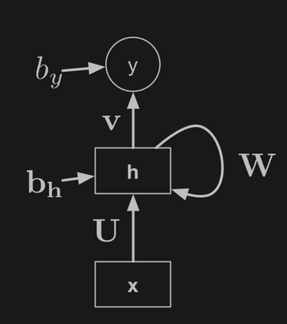

In [ ]:
errs = list()
accs = list()

error = 0
accuracy = 0

In [ ]:
def hard_thresh1(x, thresh=.5):
    x = x.squeeze()

    for t1, t2 in enumerate(x):
      if t2 > thresh:
          x[t1] = 1
      else: 
          x[t1] = 0
    return x

def hard_thresh2(x, thresh=.5):
    if x > thresh:
      return 1
    else:
      return 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(out):
    return out * (1 - out)

def bin2dec(b):
    out = 0
    for i, x in enumerate(b[::-1]):
        out += x * pow(2, i)
    
    return out

Training

In [ ]:
for i in range(ITER_NUM + 1):
    
    # generating random number between 0-128
    a_dec = np.random.randint(largest / 2)
    b_dec = np.random.randint(largest / 2)
    # a + b = c
    c_dec = a_dec + b_dec
    
    # converting to binary
    a_bin = binary[a_dec]
    b_bin = binary[b_dec]
    c_bin = binary[c_dec]
    
    pred = np.zeros_like(c_bin)
    
    overall_err = 0 # total error in the whole calculation process.
    
    output_deltas = list()
    hidden_values = list()
    hidden_values.append(np.zeros(HIDDEN_DIM))
    
    future_delta = np.zeros(HIDDEN_DIM)
    
    # forward propagation
    for pos in range(BIN_DIM)[::-1]:
        X = np.array([[a_bin[pos], b_bin[pos]]]) # shape=(1, 2)
        Y = np.array([[c_bin[pos]]]) # shape=(1, 1)

        
        hidden = sigmoid(np.dot(X, u) + np.dot(hidden_values[-1], w) + b_h)
        output = sigmoid(np.dot(hidden, v) + b_y)
        # hidden = hard_thresh1(np.dot(X, u) + np.dot(hidden_values[-1], w), thresh=0.5)
        # output = hard_thresh2(np.dot(hidden, v), thresh=0.5)
        
        pred[pos] = np.round(output[0][0])
        # pred[pos] = output
        # squared mean error
        output_err = Y - output
        output_deltas.append(output_err * deriv_sigmoid(output))
        hidden_values.append(hidden)
        
        overall_err += np.abs(output_err[0])

    # backpropagation through time
    for pos in range(BIN_DIM):
        X = np.array([[a_bin[pos], b_bin[pos]]])
        
        hidden = hidden_values[-(pos + 1)]
        prev_hidden = hidden_values[-(pos + 2)]
        
        output_delta = output_deltas[-(pos + 1)]
        hidden_delta = (np.dot(future_delta, w.T) + np.dot(output_delta, v.T)) * deriv_sigmoid(hidden)
        
        d_v += np.dot(np.atleast_2d(hidden).T, output_delta)
        d_w += np.dot(np.atleast_2d(prev_hidden).T, hidden_delta)
        d_u += np.dot(X.T, hidden_delta)

        d_b_y += output_delta.squeeze()
        d_b_h += hidden_delta.squeeze()

        future_delta = hidden_delta 
    
    u += ALPHA * d_u
    v += ALPHA * d_v
    w += ALPHA * d_w
    b_y += ALPHA * d_b_y
    b_h += ALPHA * d_b_h
    
    d_u *= 0
    d_v *= 0
    d_w *= 0
    d_b_y *= 0
    d_b_h *= 0

    error += overall_err
    if (bin2dec(pred) == c_dec):
        accuracy += 1
    # perc =  accuracy / BIN_DIM
    if (i % 1000 == 0):
        errs.append(error)
        accs.append(accuracy)
        
        error = 0
        accuracy = 0
    
    if (i % 1000 == 0):
        print('Iter', i)
        print("Error :", overall_err)
        print("Pred :", pred)
        print("True :", c_bin)
        print(a_dec, "+", b_dec, "=", bin2dec(pred))
        # print("accuracy =", perc,"%")
        print('----------')

Iter 0
Error : [3.74961111]
Pred : [1 1 1 0 1 0 1 0]
True : [1 0 0 0 1 0 1 0]
32 + 106 = 234
----------
Iter 1000
Error : [3.73565838]
Pred : [1 1 1 1 0 0 1 0]
True : [0 1 1 1 1 0 1 0]
104 + 18 = 242
----------
Iter 2000
Error : [2.57879806]
Pred : [0 1 0 1 0 0 0 0]
True : [0 1 0 1 0 0 1 0]
47 + 35 = 80
----------
Iter 3000
Error : [0.56627637]
Pred : [1 0 1 0 1 1 0 0]
True : [1 0 1 0 1 1 0 0]
108 + 64 = 172
----------
Iter 4000
Error : [0.15773564]
Pred : [0 1 1 0 0 0 1 0]
True : [0 1 1 0 0 0 1 0]
2 + 96 = 98
----------
Iter 5000
Error : [0.15816055]
Pred : [0 1 1 0 1 0 1 1]
True : [0 1 1 0 1 0 1 1]
105 + 2 = 107
----------
Iter 6000
Error : [0.26528176]
Pred : [0 1 1 1 0 0 1 1]
True : [0 1 1 1 0 0 1 1]
36 + 79 = 115
----------
Iter 7000
Error : [0.28966762]
Pred : [1 0 0 1 1 1 0 1]
True : [1 0 0 1 1 1 0 1]
52 + 105 = 157
----------
Iter 8000
Error : [0.23269456]
Pred : [1 0 0 1 0 1 0 0]
True : [1 0 0 1 0 1 0 0]
75 + 73 = 148
----------
Iter 9000
Error : [0.17375564]
Pred : [1 1 1 0 0

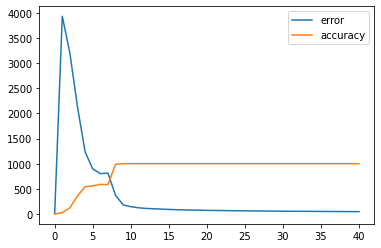

In [ ]:
plt.plot(errs, label='error')
plt.plot(accs, label='accuracy')
plt.legend()

Final Beights and Biases

In [ ]:
print('cell input weight :\n',u)
print('----------')
print('hidden state weights :\n', w)
print('----------')
print('cell output weight :\n',v)
print('----------')
print('cell output bias :\n', b_y)
print('----------')
print('hidden state bias :\n',b_h)

cell input weight :
 [[-8.34959908 -3.2206385   6.52109677  7.87172919]
 [-6.66069352 -8.11137581 -6.2303727   6.41540534]]
----------
hidden state weights :
 [[ 9.04494076  1.51848872 -1.45571811 -0.11857446]
 [ 1.26582    -0.97338814 -0.28806055  0.17536975]
 [ 0.99912829  0.82465259 -0.30964609 -0.77795016]
 [ 0.49033549  1.16885562  6.9656069   7.82669916]]
----------
cell output weight :
 [[  3.55661526]
 [-13.23048841]
 [ 11.19278595]
 [-10.17431988]]
----------
cell output bias :
 4.446952681977326
----------
hidden state bias :
 [  1.7512838    3.66778153  -3.3075568  -10.68699538]
